<a href="https://colab.research.google.com/github/jsroa15/KKBOX/blob/main/Transactions_data_mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Import

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
#Loading data

transactions=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/KKBOX/transactions.csv')

In [5]:
transactions.msno.nunique()

2363626

In [6]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21547746 entries, 0 to 21547745
Data columns (total 9 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   msno                    object
 1   payment_method_id       int64 
 2   payment_plan_days       int64 
 3   plan_list_price         int64 
 4   actual_amount_paid      int64 
 5   is_auto_renew           int64 
 6   transaction_date        int64 
 7   membership_expire_date  int64 
 8   is_cancel               int64 
dtypes: int64(8), object(1)
memory usage: 1.4+ GB


In [7]:
transactions.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,YyO+tlZtAXYXoZhNr3Vg3+dfVQvrBVGO8j1mfqe4ZHc=,41,30,129,129,1,20150930,20151101,0
1,AZtu6Wl0gPojrEQYB8Q3vBSmE2wnZ3hi1FbK1rQQ0A4=,41,30,149,149,1,20150930,20151031,0
2,UkDFI97Qb6+s2LWcijVVv4rMAsORbVDT2wNXF0aVbns=,41,30,129,129,1,20150930,20160427,0
3,M1C56ijxozNaGD0t2h68PnH2xtx5iO5iR2MVYQB6nBI=,39,30,149,149,1,20150930,20151128,0
4,yvj6zyBUaqdbUQSrKsrZ+xNDVM62knauSZJzakS9OW4=,39,30,149,149,1,20150930,20151121,0


## *Exploratory Data Analysis for Transactions table*

In [8]:
#Exploring missing values

transactions.isnull().sum()

msno                      0
payment_method_id         0
payment_plan_days         0
plan_list_price           0
actual_amount_paid        0
is_auto_renew             0
transaction_date          0
membership_expire_date    0
is_cancel                 0
dtype: int64

In [ ]:
#Installing Sweetviz to generate a EDA report in HTML

!pip install sweetviz

In [11]:
#Executing the EDA report for transactions

import sweetviz as sv

report_transactions=sv.analyze(transactions)
report_transactions.show_html('transactions_EDA.html',open_browser=False) 



Report transactions_EDA.html was generated.



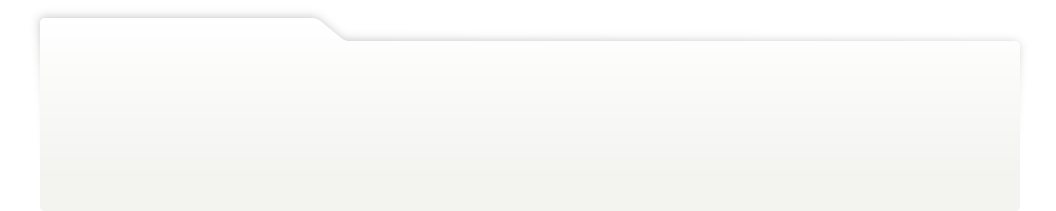
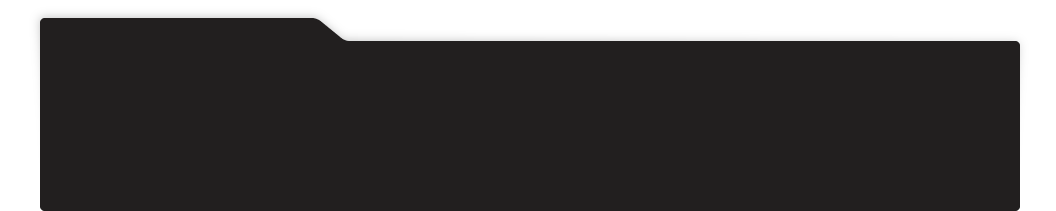
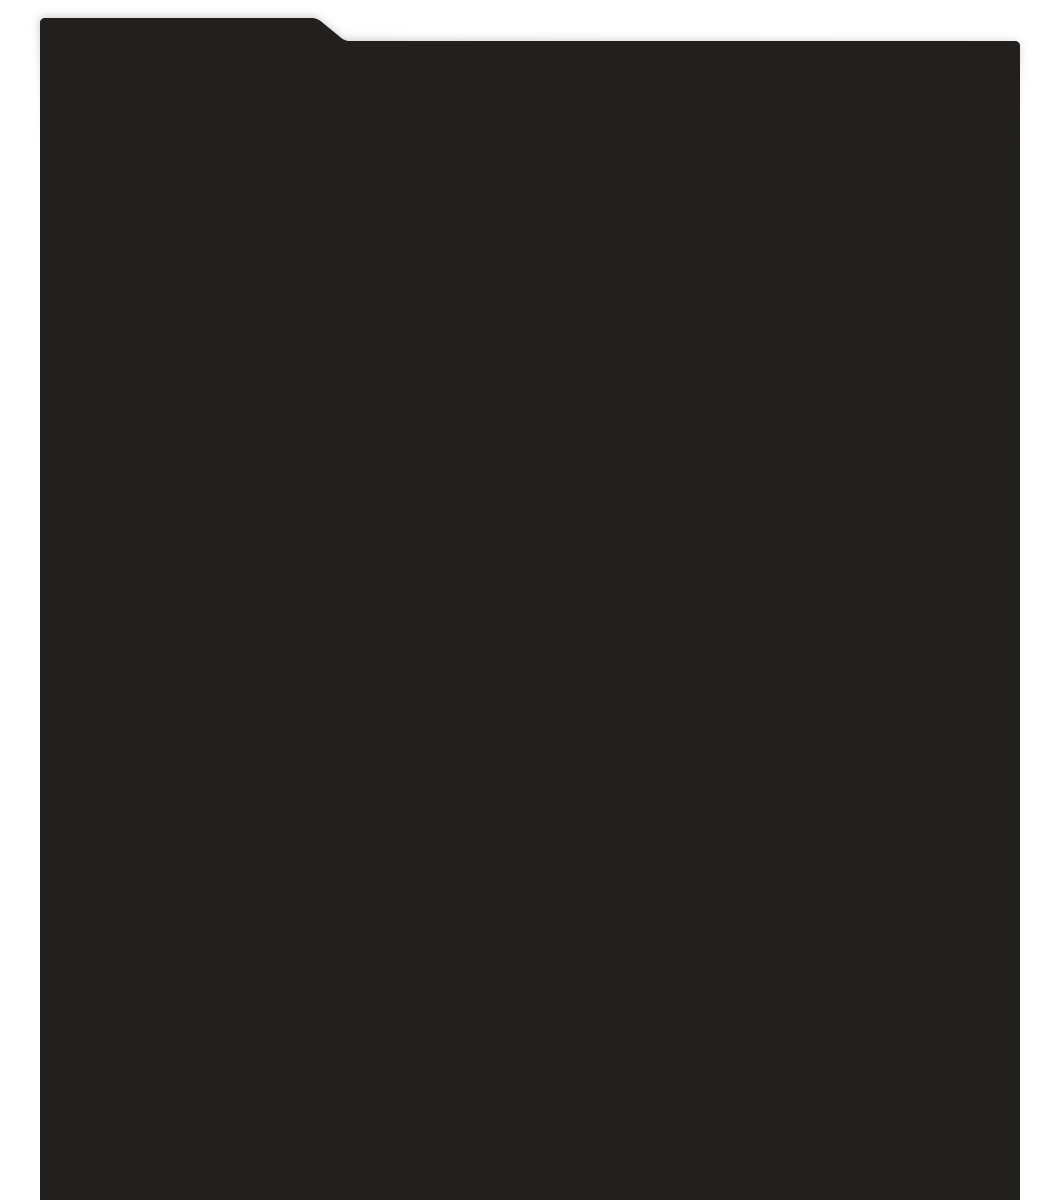
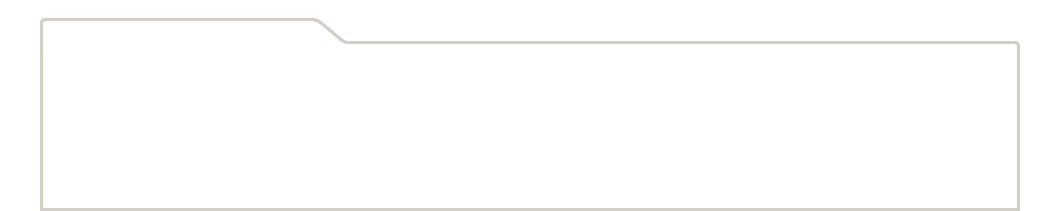
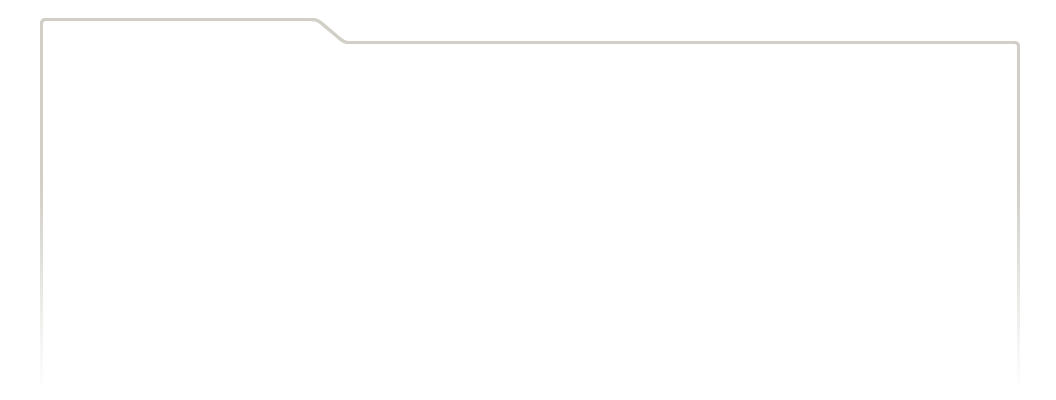
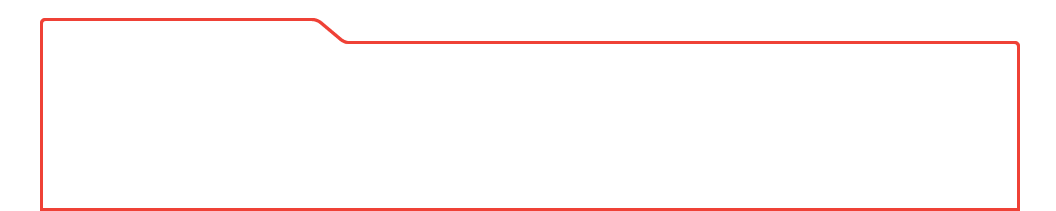
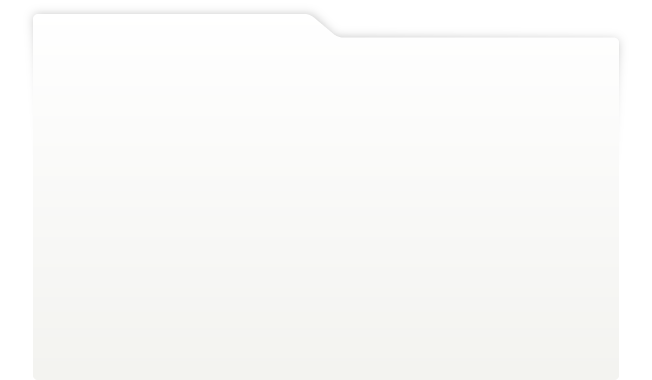
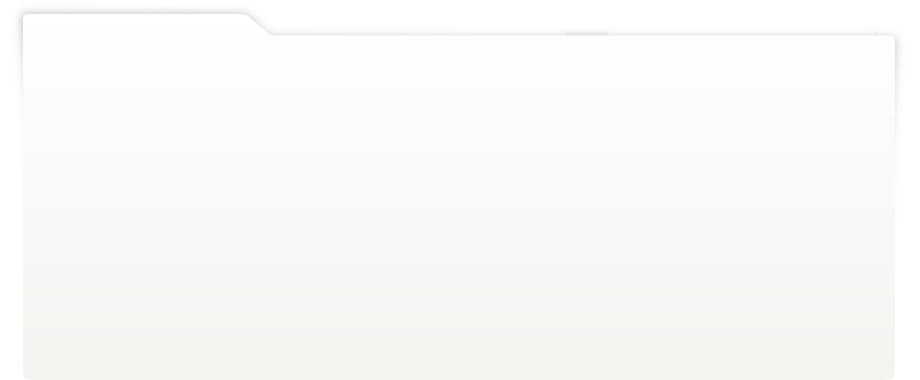
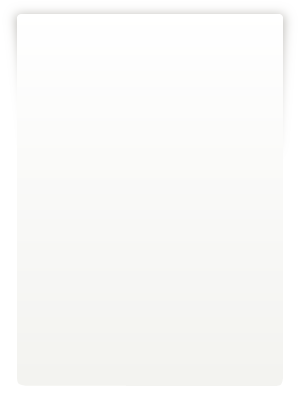
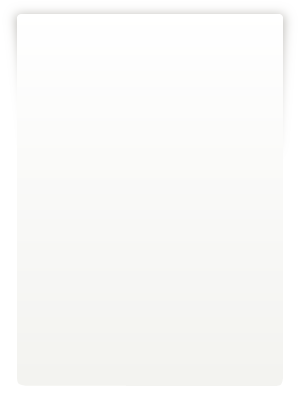
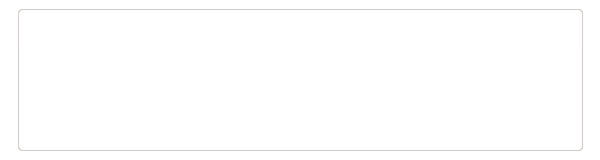
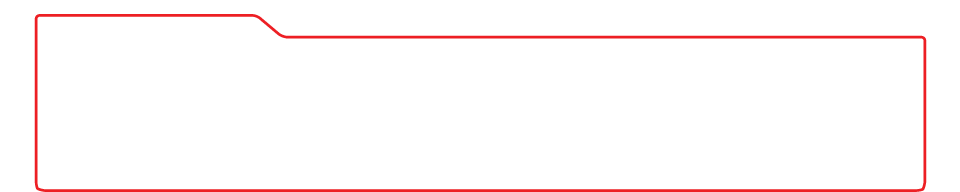
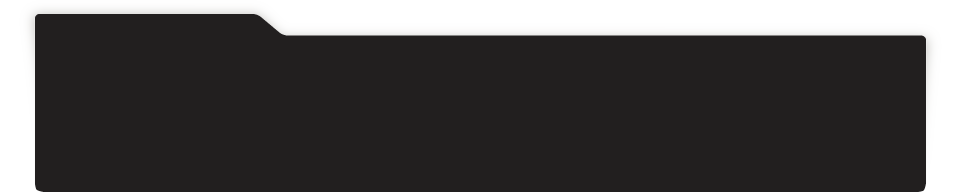
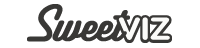
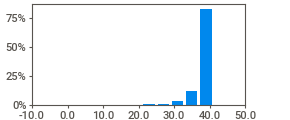
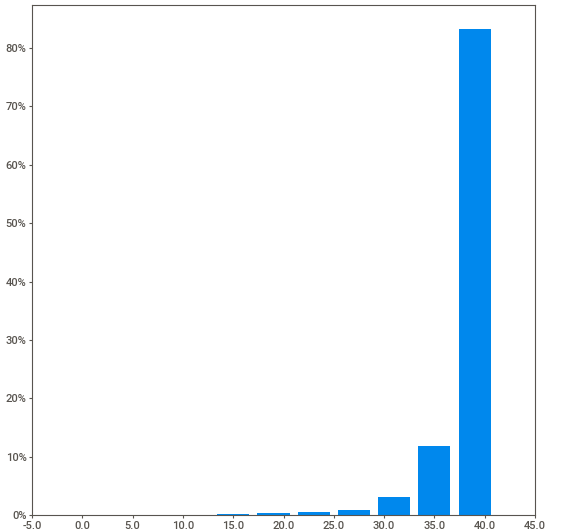
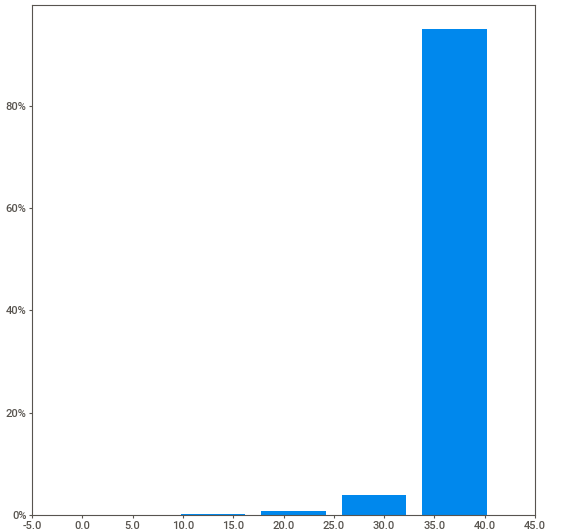
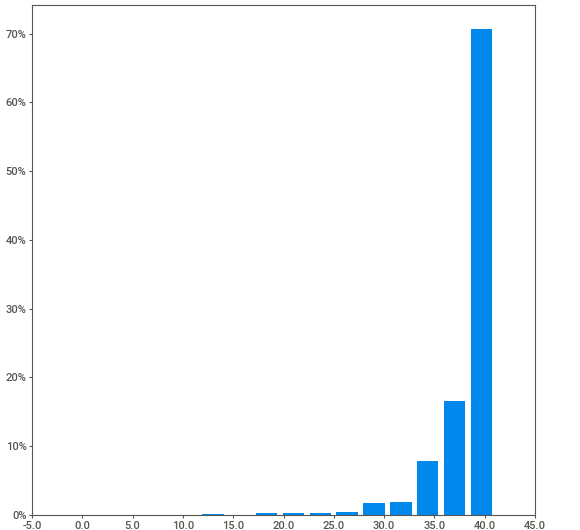
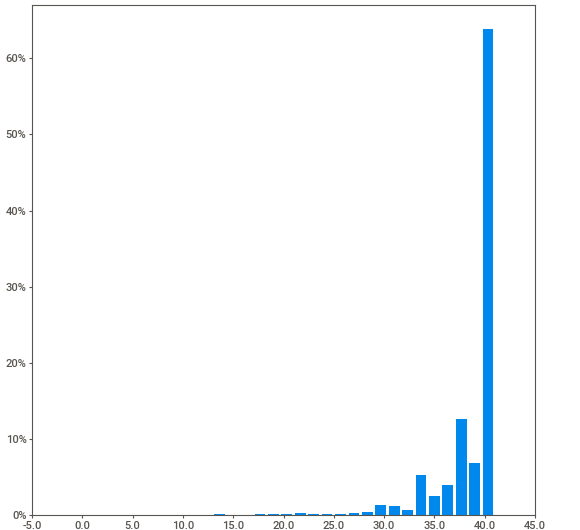
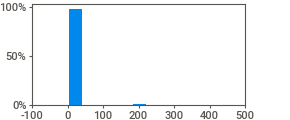
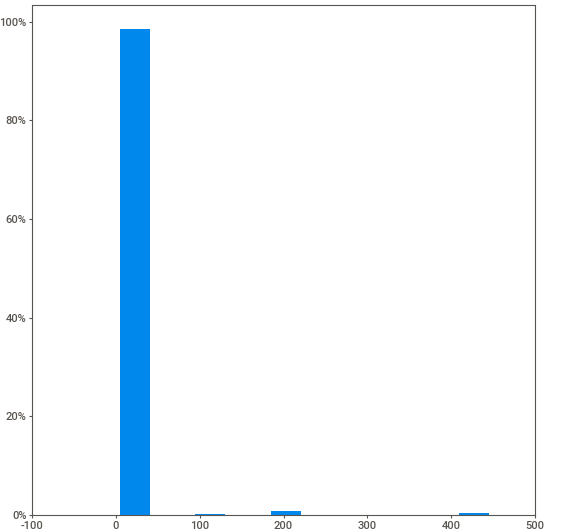
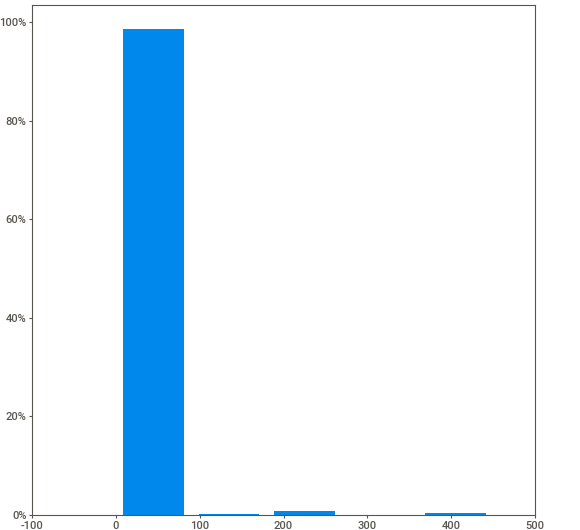
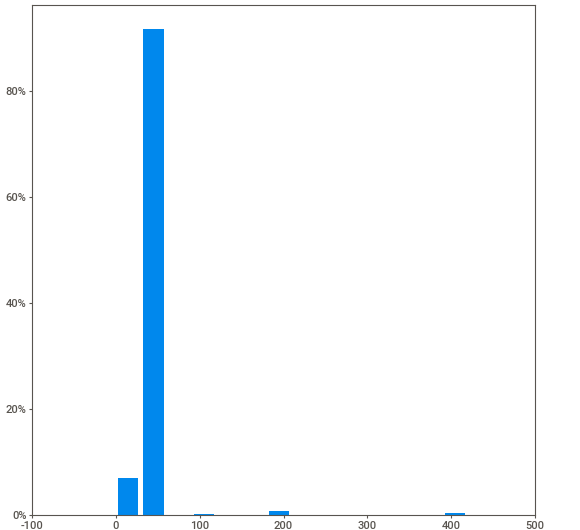
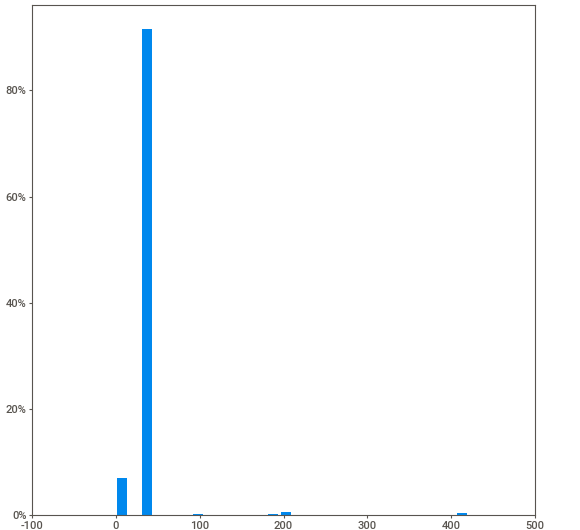
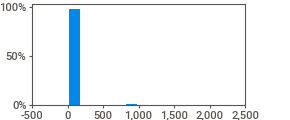
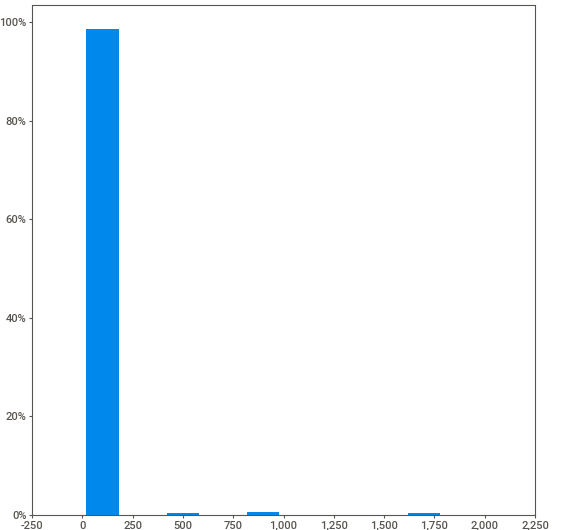
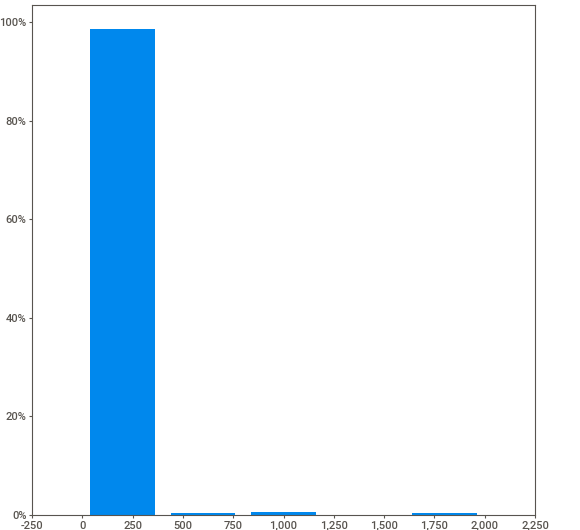
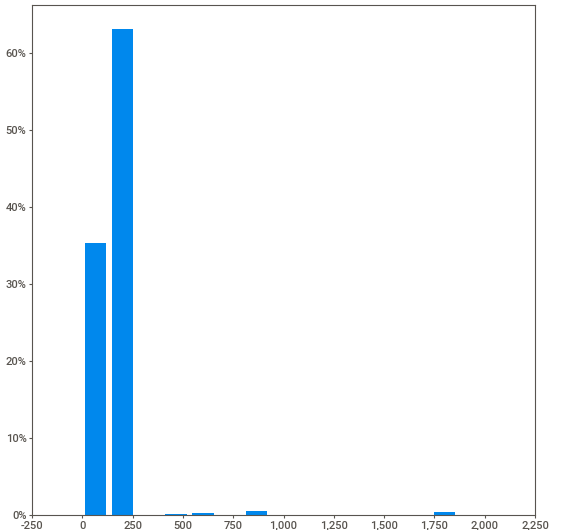
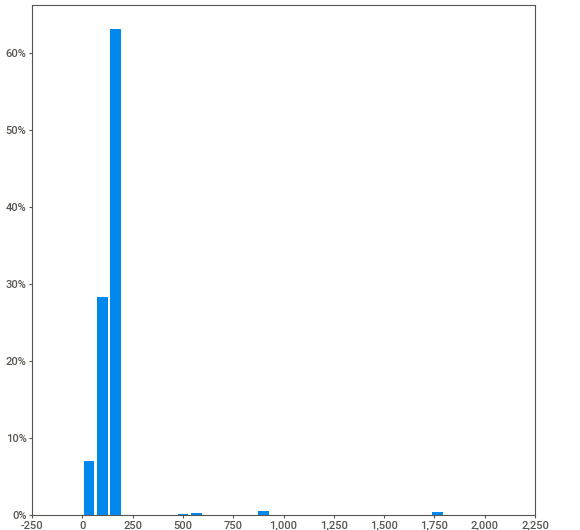
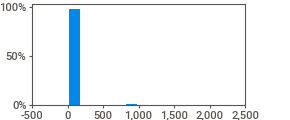
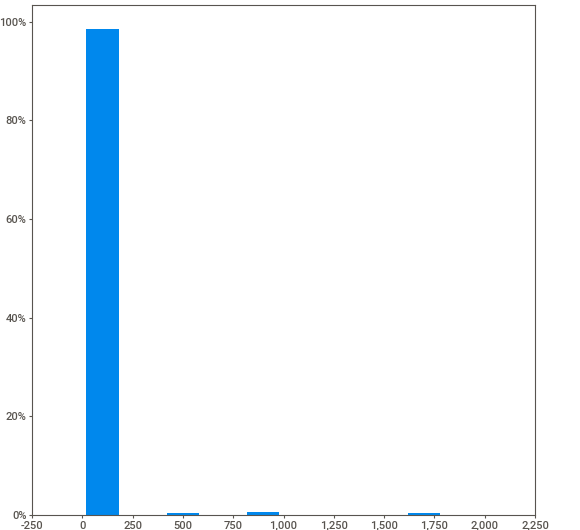
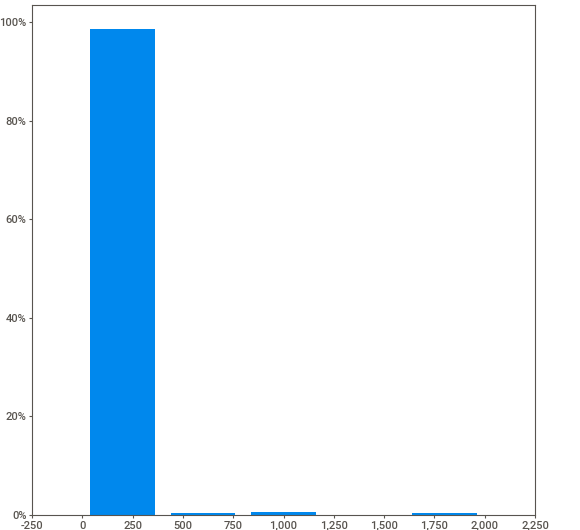
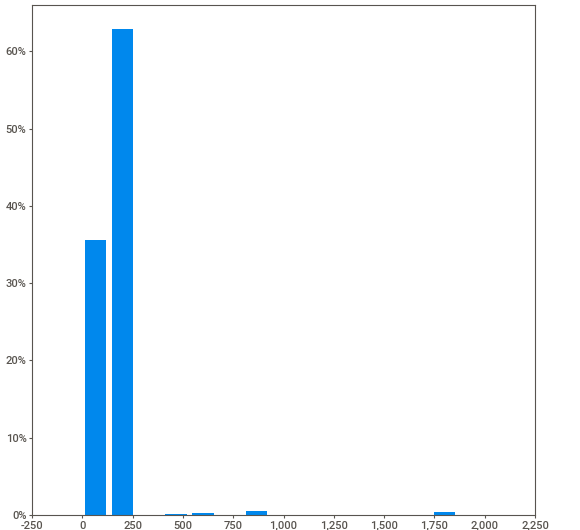
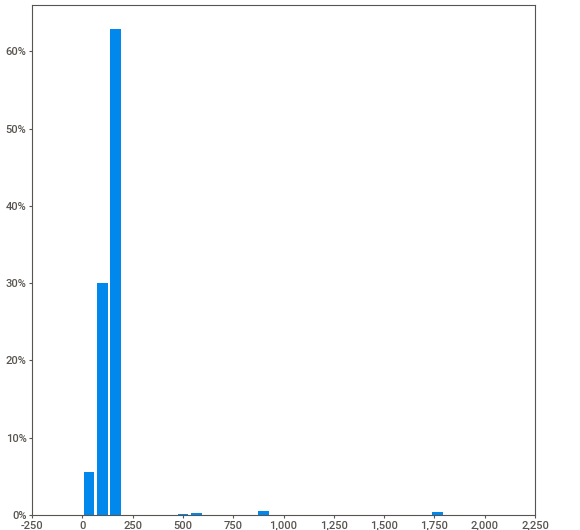
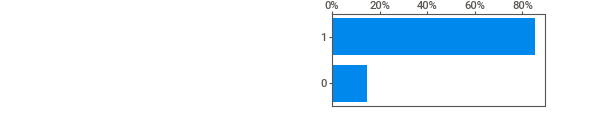
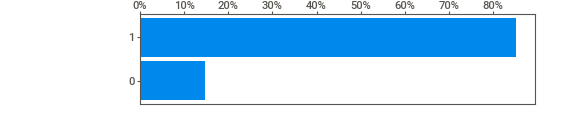
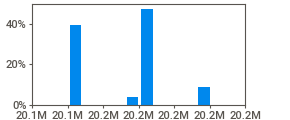
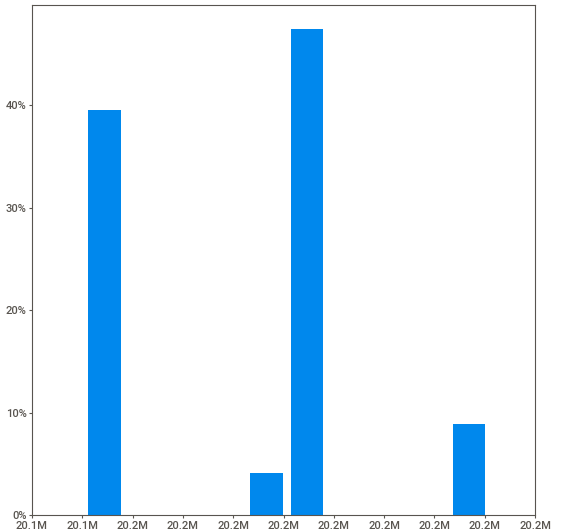
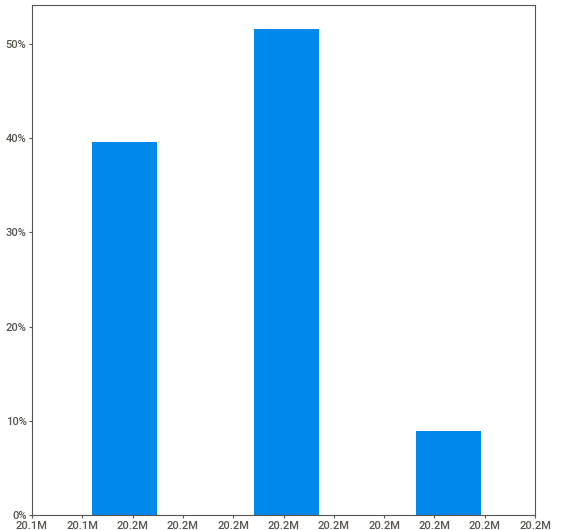
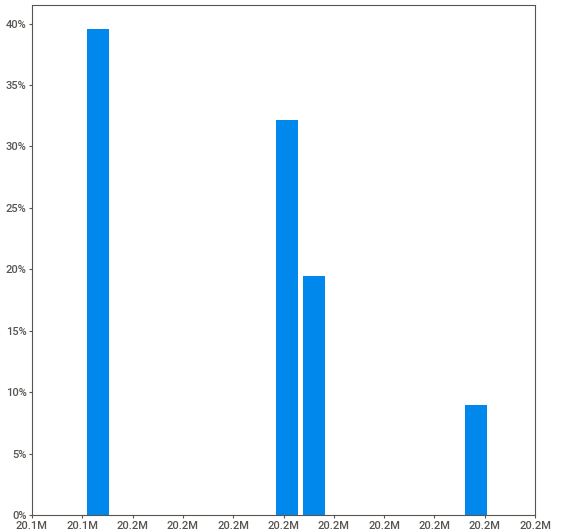
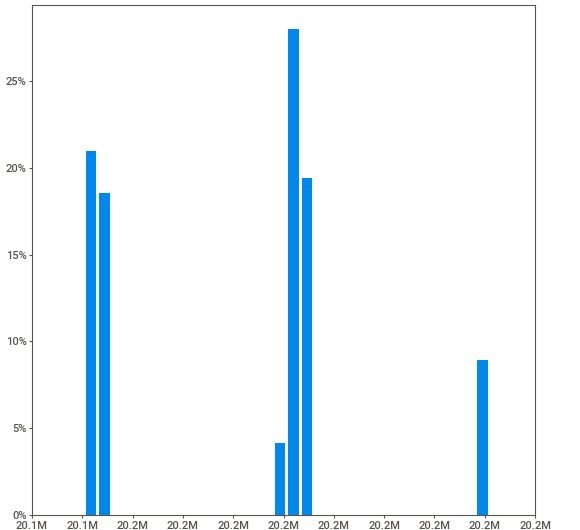
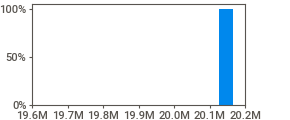
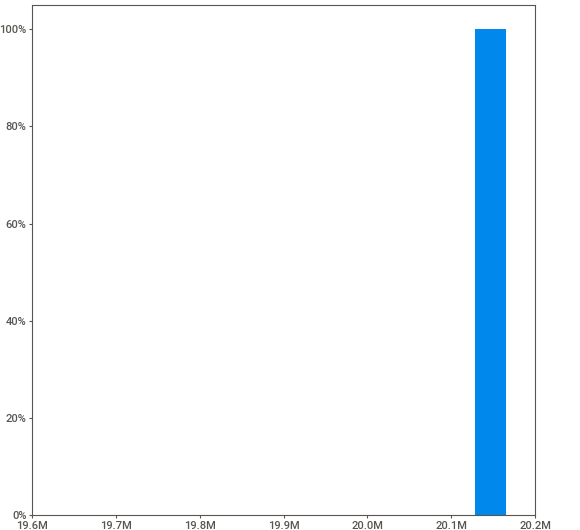
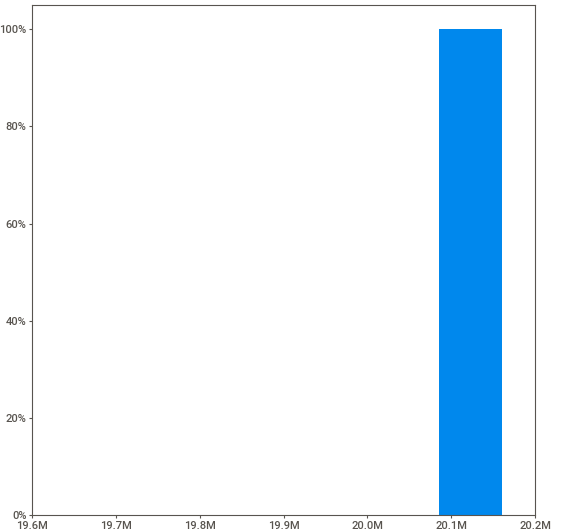
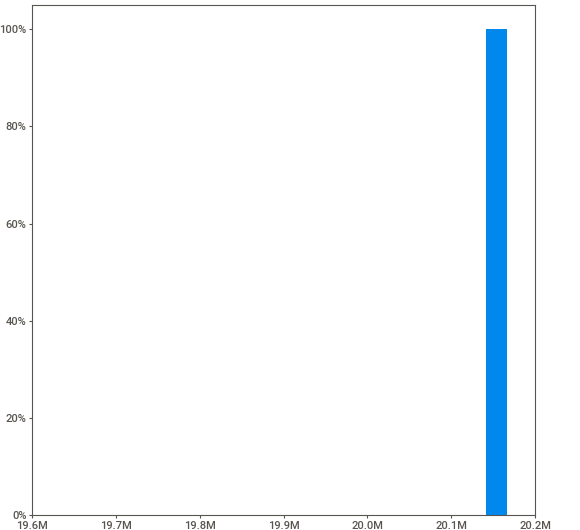
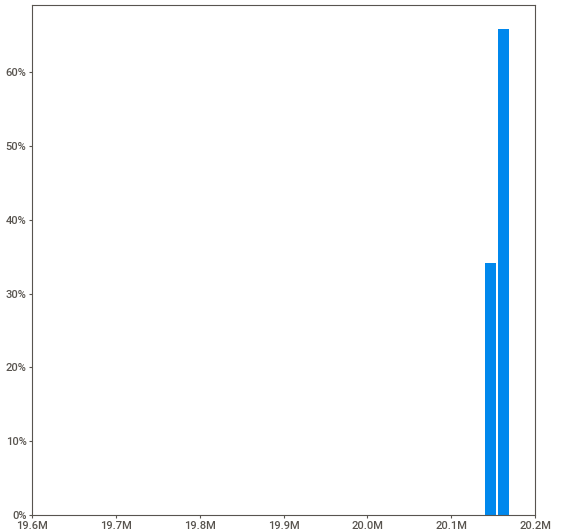
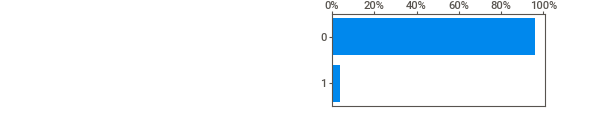
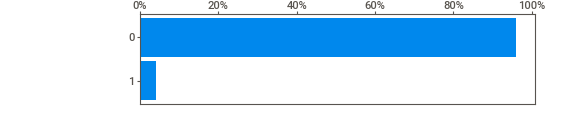
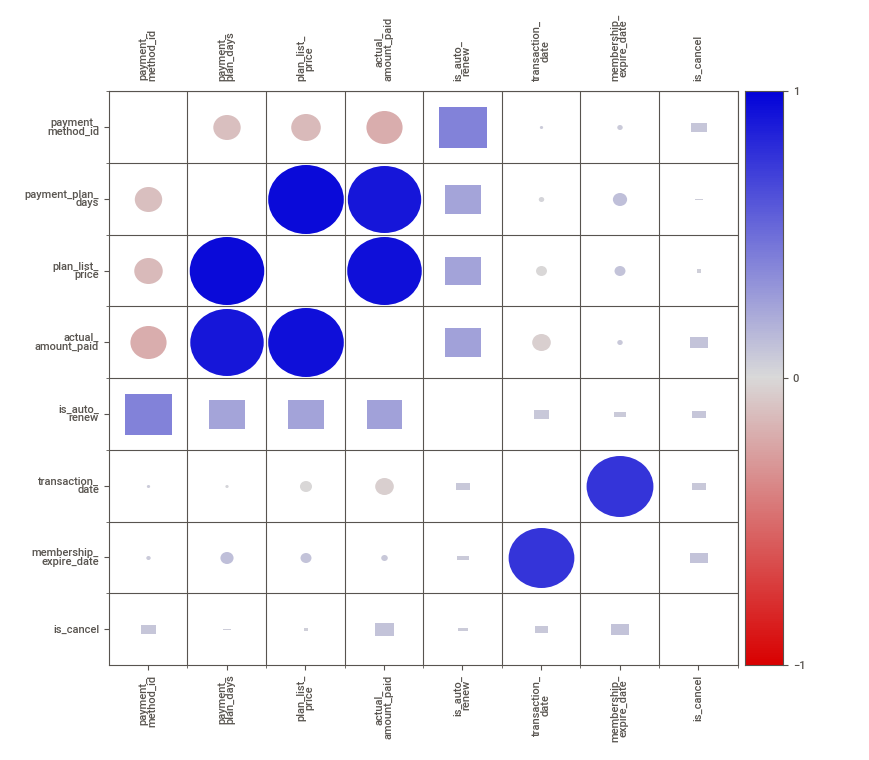
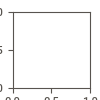

In [12]:
#Open EDA report

import IPython

IPython.display.HTML('transactions_EDA.html')

In [13]:
#Some feature engineering

#Create a feature to mark if customer has received any kind of discount
transactions['discount']=np.where(
    
    (transactions['plan_list_price']>0) & (transactions['actual_amount_paid']==0),
    1,0

)

#Creating feature to group payment plan days

label_ranges = [0, 30, 60, 90, 180, np.inf]                                   #Defining intervals
label_names = ['0-30', '31-60', '61-90','91-180','>180']                      #Defining labels for intervals

transactions['range_plan_days']=pd.cut(transactions.payment_plan_days,bins=label_ranges,labels=label_names)
#Create feature to establish if customer is paying more than plan offer

transactions['pay_more']=np.where(
    
    (transactions['plan_list_price']==0) & (transactions['actual_amount_paid']>0),
    1,0

)


In [14]:
#Change Date format in Transactions Data Frame

transactions.transaction_date=transactions.transaction_date.astype('str')
transactions.membership_expire_date=transactions.membership_expire_date.astype('str')


transactions['transaction_date']=pd.to_datetime(transactions.transaction_date,errors='coerce')
#transactions['membership_expire_date']=pd.to_datetime(transactions.membership_expire_date,errors='coerce')

In [15]:
#Building an agregate dateframe transactions

df_transactions=transactions.groupby(by='msno').agg({'payment_method_id': 'median','payment_plan_days':'median','plan_list_price':'median','actual_amount_paid':'median','is_auto_renew':'max','is_cancel':'max','is_cancel':'max','discount':'max','pay_more':'max'}).reset_index()
df_transactions

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,is_cancel,discount,pay_more
0,+++FOrTS7ab3tIgIh8eWwX4FqRv8w/FoiOuyXsFvphY=,35.0,7.0,0.0,0.0,0,0,0,0
1,+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,38.0,410.0,1788.0,1788.0,0,0,0,0
2,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,41.0,30.0,99.0,99.0,1,0,0,0
3,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,39.0,30.0,149.0,149.0,1,0,0,1
4,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,41.0,30.0,149.0,149.0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
2363621,zzz9+ZF4+GMyt63oU8xfjo1EkvRqH5OINlES0RUJI6I=,41.0,30.0,129.0,129.0,1,1,0,0
2363622,zzzF1KsGfHH3qI6qiSNSXC35UXmVKMVFdxkp7xmDMc0=,40.0,30.0,149.0,149.0,1,0,0,0
2363623,zzzN9thH22os1dRS0VHReY/8FTfGHOi86//d+wGGFsQ=,41.0,30.0,99.0,99.0,1,1,0,0
2363624,zzztsqkufVj9DPVJDM3FxDkhlbCL5z4aiYxgPSGkIK4=,35.0,7.0,0.0,0.0,0,0,0,0


In [16]:
#Extrating most frequent range of day plans for each user

transactions_range=transactions[['msno','range_plan_days']]
transactions_range['range_plan_days']=transactions_range['range_plan_days'].astype('str')
transactions_range=transactions_range.groupby('msno').agg(pd.Series.mode).reset_index()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [17]:
#Merging transactions range and df_transactions

df_transactions=df_transactions.merge(transactions_range,how='left')

#Export df_transactions

df_transactions.to_csv('/content/drive/MyDrive/Colab Notebooks/KKBOX/df_transactions.csv',index=False)